In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras as kr

from keras.models import Sequential
from keras.layers import Dense

%matplotlib inline

Using TensorFlow backend.


In [2]:
bikes = pd.read_csv("hour.csv")
bikes

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


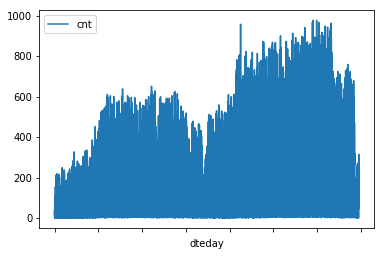

In [3]:
bikes[:].plot(x="dteday",y="cnt")

In [2]:
from numpy import genfromtxt
bikes = genfromtxt('hour.csv', delimiter=',')

# np.random.shuffle(bikes)

X = bikes[1:,10:14]
Y = bikes[1:,16:17]

print(X)

[[0.24   0.2879 0.81   0.    ]
 [0.22   0.2727 0.8    0.    ]
 [0.22   0.2727 0.8    0.    ]
 ...
 [0.26   0.2576 0.6    0.1642]
 [0.26   0.2727 0.56   0.1343]
 [0.26   0.2727 0.65   0.1343]]


In [3]:
#X = np.array(([[4.5,6.7,8.9],[9.1,7.6,6.5],[8.7,6.5,7.0]]),dtype=float)
#Y = np.array(([[89,90],[80,70],[69,89]]),dtype=float)

Xn = X


for cont in range(4):
    Xn[:,cont] = (Xn[:,cont]/(Xn[:,cont].max()))
    
print(Xn)

[[0.24       0.2879     0.81       0.        ]
 [0.22       0.2727     0.8        0.        ]
 [0.22       0.2727     0.8        0.        ]
 ...
 [0.26       0.2576     0.6        0.19301751]
 [0.26       0.2727     0.56       0.15786999]
 [0.26       0.2727     0.65       0.15786999]]


In [13]:
Yn = Y/Y.max()
print(Yn)

[[0.01637666]
 [0.04094166]
 [0.03275333]
 ...
 [0.09211873]
 [0.06243603]
 [0.05015353]]


In [37]:
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [42]:
model.compile(loss='binary_crossentropy',
            optimizer='SGM',
            metrics=['accuracy'])

ValueError: Unknown optimizer: SGM

In [40]:
model.fit(Xn,
          Yn,
          epochs=5,
          steps_per_epoch=170)

Epoch 1/5
170/170 [==============================] - 2s 15ms/step - loss: 0.4711 - acc: 0.0000e+00
Epoch 2/5
170/170 [==============================] - 2s 15ms/step - loss: 0.4652 - acc: 0.0000e+00
Epoch 3/5
170/170 [==============================] - 2s 14ms/step - loss: 0.4633 - acc: 0.0000e+00
Epoch 4/5
170/170 [==============================] - 2s 14ms/step - loss: 0.4629 - acc: 0.0000e+00
Epoch 5/5
170/170 [==============================] - 2s 14ms/step - loss: 0.4629 - acc: 0.0000e+00


In [41]:
scores = model.evaluate(Xn, Yn)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17379/17379 [==============================] - 2s 91us/step

acc: 0.00%
